In [1]:
from storage import MongoDBStorage
from service import MongoDBSearchService

In [2]:
with open("db_host", "r") as file:
    host = file.read().rstrip()

storage = MongoDBStorage(parameters={
        "host_url": host
    })
search_service = MongoDBSearchService(storage)

In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [15]:
cursor = search_service.aggregate_filters_with_or([
        search_service.get_query_find_by_id('661931f5d172007aa8b18204'),
        search_service.get_query_find_by_id('661931fcd172007aa8b18205'),
        search_service.get_query_find_by_id('661931ffd172007aa8b18206')
    ])
test_df_list = []
for test_df in cursor:
    test_df_list.append(test_df)

Filters = [{'_id': ObjectId('661931f5d172007aa8b18204')}, {'_id': ObjectId('661931fcd172007aa8b18205')}, {'_id': ObjectId('661931ffd172007aa8b18206')}]
Custom query {'$or': [{'_id': ObjectId('661931f5d172007aa8b18204')}, {'_id': ObjectId('661931fcd172007aa8b18205')}, {'_id': ObjectId('661931ffd172007aa8b18206')}]}


Word cloud for '661931f5d172007aa8b18204'


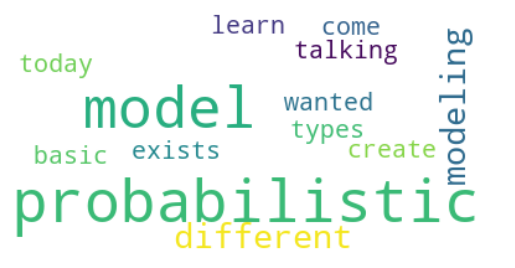

Word cloud for '661931fcd172007aa8b18205'


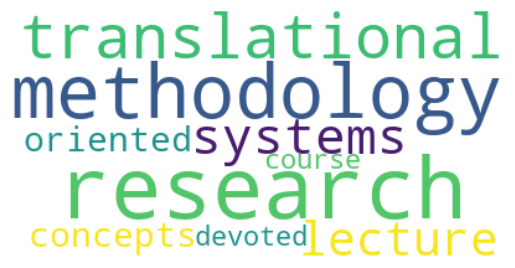

Word cloud for '661931ffd172007aa8b18206'


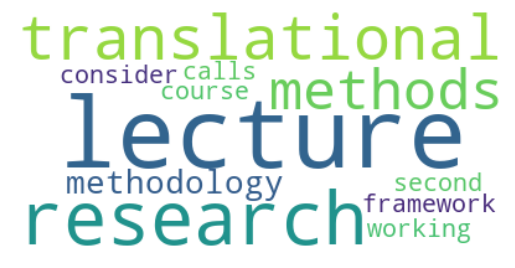

In [16]:
for test_df in test_df_list:
    print(f"Word cloud for '{test_df['_id']}'")
    word_cloud = WordCloud(width=1920, height=1080, collocations = False, background_color = 'white').generate(" ".join(test_df['keywords']))
    plt.figure(figsize=(10,10))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Word cloud for '661931f5d172007aa8b18204'


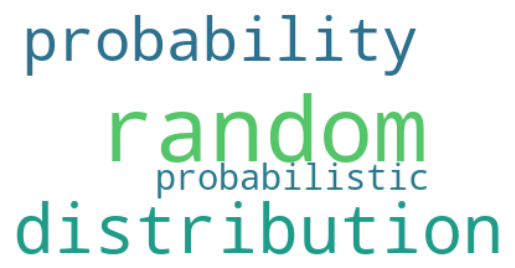

Word cloud for '661931fcd172007aa8b18205'


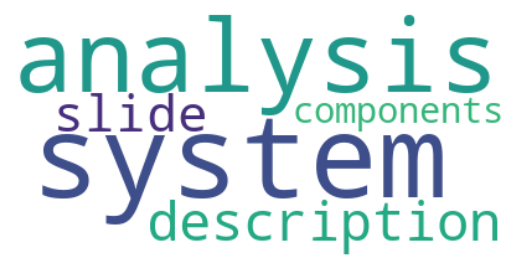

Word cloud for '661931ffd172007aa8b18206'


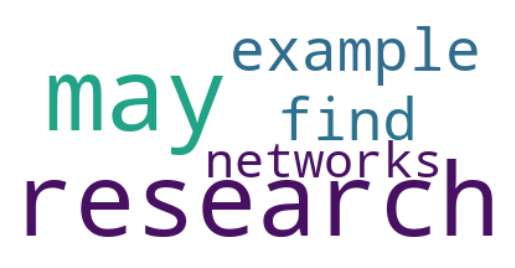

In [17]:
for test_df in test_df_list:
    print(f"Word cloud for '{test_df['_id']}'")
    word_cloud = WordCloud(width=1920, height=1080, collocations = False, background_color = 'white').generate(" ".join(test_df['topics']))
    plt.figure(figsize=(10,10))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Word cloud for '661931f5d172007aa8b18204'


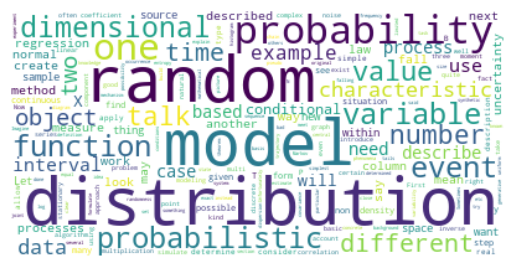

Word cloud for '661931fcd172007aa8b18205'


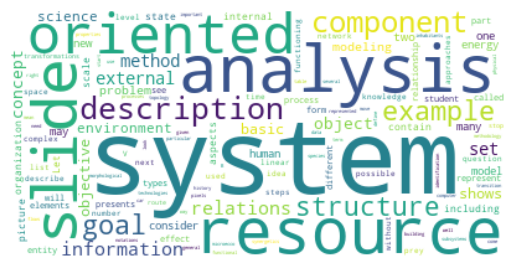

Word cloud for '661931ffd172007aa8b18206'


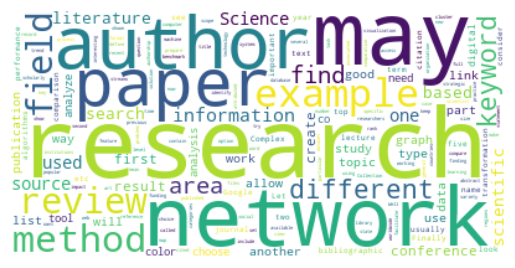

In [18]:
for test_df in test_df_list:
    print(f"Word cloud for '{test_df['_id']}'")
    word_cloud = WordCloud(width=1920, height=1080, collocations = False, background_color = 'white').generate(test_df['extracted_text'])
    plt.figure(figsize=(10,10))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Word cloud for '661931f5d172007aa8b18204'


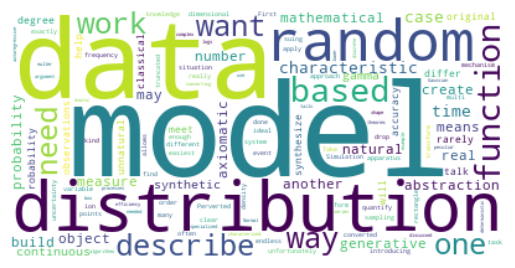

Word cloud for '661931fcd172007aa8b18205'


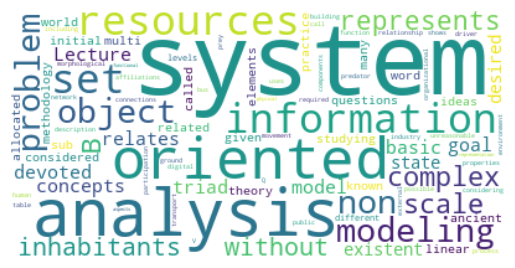

Word cloud for '661931ffd172007aa8b18206'


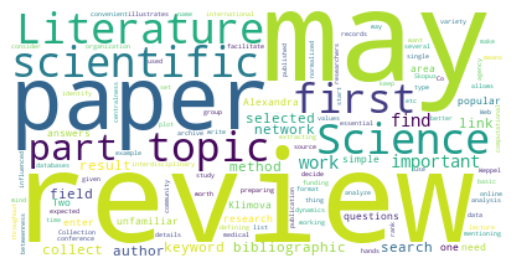

In [19]:
for test_df in test_df_list:
    print(f"Word cloud for '{test_df['_id']}'")
    word_cloud = WordCloud(width=1920, height=1080, collocations = False, background_color = 'white').generate(test_df['summary'])
    plt.figure(figsize=(10,10))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()